In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
pd.options.display.max_rows = 300

Look into using .loc to identify windows, also maybe just use the cumsum function going both ways, days from and to an attack

In [2]:
data1 = pd.read_excel('E:\EME data\Clean data\Analysis Output\FTSE and Terror merged.xlsx', parse_dates=True, index_col=0)
data1.columns

Index(['Date', 'S&P 500 COMPOSITE - PRICE INDEX (~£ )',
       'FTSE 100 - PRICE INDEX', 'nkill', 'nwound', 'propvalue', 'incident',
       'const', 'logFTSE', 'logS&P', 'L.logFTSE', 'L.logS&P', 'L.propvalue',
       'D_SP', 'D_FTSE', 'terrorattack'],
      dtype='object')

In [3]:
data1['Date'].dt.weekday_name.value_counts()

Friday       1770
Tuesday      1769
Thursday     1769
Monday       1769
Wednesday    1769
Name: Date, dtype: int64

In [4]:
data1 = pd.read_excel('E:\EME data\Clean data\Analysis Output\FTSE and Terror merged.xlsx')

## Creating the date for each terror event and then backfilling and shifting so each window1/2 marks current/next date of attack
## Then find the difference between the two for pre and post window, backfill and forwardfill
data1.loc[data1['terrorattack'] == 1, 'window1'] = data1['Date']
data1['window2'] = np.nan
data1.loc[data1['terrorattack'] == 1, 'window2'] = data1['Date']
data1['window2'] = data1['window2'].fillna(method = 'ffill', axis = 0)
data1['window2'] = data1['window2'].shift(1)
data1['pre window gap'] = data1['window1'] - data1['window2']

data1['window2'] = np.nan
data1.loc[data1['terrorattack'] == 1, 'window2'] = data1['Date']
data1['window2'] = data1['window2'].fillna(method = 'backfill', axis = 0)
data1['window2'] = data1['window2'].shift(-1)
data1['post window gap'] = data1['window2'] - data1['window1']




data1.head(20)

,Date,S&P 500 COMPOSITE - PRICE INDEX (~£ ),FTSE 100 - PRICE INDEX,nkill,nwound,propvalue,incident,const,logFTSE,logS&P,L.logFTSE,L.logS&P,L.propvalue,D_SP,D_FTSE,terrorattack,window1,window2,pre window gap,post window gap
0,1983-12-30,113.63,1000.0,0,0,0,0,1,6.907755,4.732948,NaN,NaN,NaN,NaN,NaN,0,NaT,1984-01-02,NaT,NaT
1,1984-01-02,113.63,1000.0,2,0,1830000,8,1,6.907755,4.732948,6.907755,4.732948,0.0,0.000000,0.000000,1,1984-01-02,1984-01-05,NaT,3 days
2,1984-01-03,114.83,997.5,0,0,0,0,1,6.905252,4.743453,6.907755,4.732948,1830000.0,0.010505,-0.002503,0,NaT,1984-01-05,NaT,NaT
3,1984-01-04,117.45,998.6,0,0,0,0,1,6.906354,4.766013,6.905252,4.743453,0.0,0.022560,0.001102,0,NaT,1984-01-05,NaT,NaT
4,1984-01-05,119.51,1015.8,0,1,150000,2,1,6.923432,4.783400,6.906354,4.766013,0.0,0.017387,0.017077,1,1984-01-05,1984-01-09,3 days,4 days
5,1984-01-06,120.31,1029.0,0,0,0,0,1,6.936343,4.790072,6.923432,4.783400,150000.0,0.006672,0.012911,0,NaT,1984-01-09,NaT,NaT
6,1984-01-09,119.58,1034.6,0,2,0,1,1,6.941770,4.783986,6.936343,4.790072,0.0,-0.006086,0.005427,1,1984-01-09,1984-01-10,4 days,1 days
7,1984-01-10,119.84,1034.3,1,2,30000,2,1,6.941480,4.786158,6.941770,4.783986,0.0,0.002172,-0.000290,1,1984-01-10,1984-01-16,1 days,6 days
8,1984-01-11,120.24,1023.4,0,0,0,0,1,6.930886,4.789490,6.941480,4.786158,30000.0,0.003332,-0.010594,0,NaT,1984-01-16,NaT,NaT
9,1984-01-12,119.99,1031.3,0,0,0,0,1,6.938575,4.787408,6.930886,4.789490,0.0,-0.002081,0.007690,0,NaT,1984-01-16,NaT,NaT


TODO: Create a function to determine whether attacks are eligible
      Create a function that determines the window for these attacks
      Plot the response
      Explore event study methodology

In [5]:
data = pd.read_excel('E:\EME data\Clean data\Analysis Output\FTSE and Terror merged.xlsx')

def event_cleaner(data, pre_day_window = 5, post_day_window = 5,
                  criteria = ['attack', 'fatalities', 'wounded', 'damage'], criteria_n = 10):
    
    #Creating a variable that counts the number of days since an attack
    data_event = data.copy()
    data_event['Day Placeholder'] = data_event['terrorattack'].cumsum()
    data_event['Days since attack'] = data_event.groupby('Day Placeholder')['const'].cumsum().shift(1)
    data_event = data_event.drop(['Day Placeholder'], axis = 1)
    
    #Creating a variable that determines whether an attack occurs in an isolated window BEFORE the attack
    data_event['window pre attack'] = 0
    data_event.loc[(data_event['Days since attack'] > (pre_day_window - 1)), 'window pre attack' ] = 1
    
    #Now we need to check that events don't happen after the attack within our post attack window
    
    data_event['window post attack'] = 0
    data_event.loc[(data_event['Days since attack'].shift(-1*post_day_window) == (post_day_window)), 'window post attack'] = 1
    
    #Creating a variable for the pre- and post- window being clear:
    data_event['window clear'] = 0
    data_event.loc[((data_event['window pre attack'] == 1) & (data_event['window post attack'] == 1)), 'window clear'] = 1    
    
    #Now we determine what our criteria are for the event:
    data_event['event_study_eligible'] = 0

        
    if criteria == 'fatalities':
        data_event.loc[((data_event['window clear'] == 1) & (data_event['nkill'] > (criteria_n - 1))), 'event_study_eligible'] = 1

    if criteria == 'wounded':
        data_event.loc[((data_event['window clear'] == 1) & (data_event['nwound'] > (criteria_n -1))), 'event_study_eligible'] = 1
    if criteria == 'damage':
        data_event.loc[((data_event['window clear'] == 1) & (data_event['propvalue'] > (criteria_n -1))), 'event_study_eligible'] = 1
    
    else:
        data_event.loc[((data_event['window clear'] == 1) & (data_event['terrorattack'] == 1)), 'event_study_eligible'] = 1
    ##Currently we have a dataframe with information on all attacks and whether they'd appear in our event study. Now we create
    # an array that lists the indexes of all observations before and after the attack
    #in our event study
    
    #Creating a list for events in our event study:
    event_index = list((data_event[data_event['event_study_eligible'] == 1]).index)
    
    #Finding the index of the observations in our eligible event study windows:
    #####NEED TO PICK OBSERVATIONS BEFORE AND AFTER TERROR ATTACK CONSISTENTLY AND THEN FIGURE OUT WHEN THE ATTACK IS SO WE 
    ##### CAN DRAW A VERTICAL LINE
    indexer = []
    index_array = []
    for i in np.arange(len(event_index)):
        for x in np.arange(pre_day_window):
            indexer = [event_index[i]] + [(event_index[i] - x)]
            indexer = list(np.arange(indexer[0], indexer[1], -1))
        for x in np.arange(post_day_window):
            indexer = [event_index[i]] + [(event_index[i] - x)]
            indexer = list(np.arange(indexer[0], indexer[1], -1))
        index_array = index_array + [indexer]
    return data_event, index_array


# def event_graph(data, array):
#     fig, axes = plt.subplots( figsize = (10, 5))
    
#     for i in np.arange(len(array)):
#         plot_df = data.iloc[array[i][-1] : array[i][0] , :].copy()
#         plot_df['Reindexed'] = (plot_df['FTSE 100 - PRICE INDEX']/plot_df.loc[0, 'FTSE 100 - PRICE INDEX'])*1000
#         plot_df = plot_df.reset_index(drop=True)
#         %debug
#         axes.plot(plot_df.index, plot_df['Reindexed'], alpha = 0.2, lw= 0.2 )
#     total_mean = []
#     day_list = np.arange(len(array[0]))
#     for day in day_list:
#         running_mean = 0
#         for i in np.arange(len(array)):
            
#             plot_df = data.iloc[array[i][-1] : array[i][0] + 1, :].copy()
#             plot_df['Reindexed'] = (plot_df['FTSE 100 - PRICE INDEX']/plot_df.iloc[0, 1])*1000
#             plot_df = plot_df.reset_index(drop=True)
        
#             running_mean = running_mean + plot_df.loc[day, 'Reindexed'  ]
#         total_mean = total_mean + [running_mean/len(array)]
#     axes.plot(plot_df.index, total_mean, color = 'blue')
#     plt.axvline(x=5, color = 'r', lw = 0.5)
#     axes.set_xticks(np.arange(len(array[0])))
#     fig.tight_layout()
#     plt.show()
# test1_data, test1_array = event_cleaner(data)
# event_graph(test1_data, test1_array)

[0 1 2 3 4 5 6 7 8]


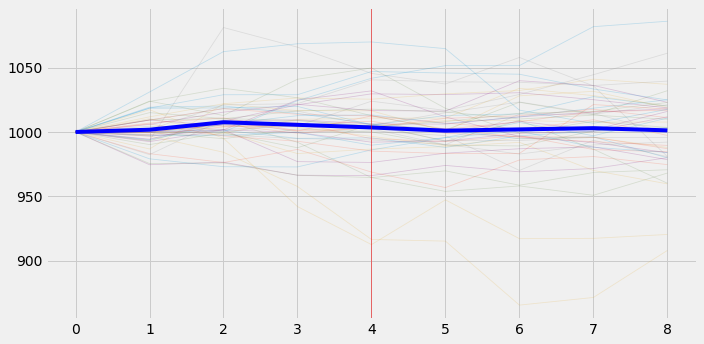

In [6]:

def event_graph(data, array):
    fig, axes = plt.subplots( figsize = (10, 5))
    
    for i in np.arange(len(array)):
        
        plot_df = data.iloc[array[i][-1] : array[i][0] + 1 , :].copy()
        plot_df = plot_df.reset_index(drop=True)
        plot_df['Reindexed'] = (plot_df['FTSE 100 - PRICE INDEX']/plot_df.loc[0, 'FTSE 100 - PRICE INDEX'])*1000
        
        
        axes.plot(plot_df.index, plot_df['Reindexed'], alpha = 0.2, lw= 0.8 )
    total_mean = []
    day_list = np.arange(len(array[0]))
    print(day_list)
    for day in day_list:
        running_mean = 0
        for i in np.arange(len(array)):
           
            plot_df = data.iloc[array[i][-1] : array[i][0] +1 , :].copy()
            plot_df = plot_df.reset_index(drop=True)
            plot_df['Reindexed'] = (plot_df['FTSE 100 - PRICE INDEX']/plot_df.loc[0, 'FTSE 100 - PRICE INDEX'])*1000
            
        
            running_mean = running_mean + plot_df.loc[day, 'Reindexed'  ]
        total_mean = total_mean + [running_mean/len(array)]
    axes.plot(plot_df.index, total_mean, color = 'blue')
    plt.axvline(x=4, color = 'r', lw = 0.5)
    axes.set_xticks(np.arange(len(array[0])))
    fig.tight_layout()
    plt.show()
test1_data, test1_array = event_cleaner(data, pre_day_window= 10, post_day_window= 10)

event_graph(test1_data, test1_array)

In [7]:
test1_data, test1_array = event_cleaner(data, pre_day_window=3, post_day_window=3)

In [8]:
print(test1_array[0], test1_array[0][-1], test1_array[0][0])

[11, 10] 10 11


In [9]:
data.loc[11, 'terrorattack']

1

In [10]:
test1_data.head(15)

,Date,S&P 500 COMPOSITE - PRICE INDEX (~£ ),FTSE 100 - PRICE INDEX,nkill,nwound,propvalue,incident,const,logFTSE,logS&P,...,L.logS&P,L.propvalue,D_SP,D_FTSE,terrorattack,Days since attack,window pre attack,window post attack,window clear,event_study_eligible
0,1983-12-30,113.63,1000.0,0,0,0,0,1,6.907755,4.732948,...,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
1,1984-01-02,113.63,1000.0,2,0,1830000,8,1,6.907755,4.732948,...,4.732948,0.0,0.000000,0.000000,1,1.0,0,1,0,0
2,1984-01-03,114.83,997.5,0,0,0,0,1,6.905252,4.743453,...,4.732948,1830000.0,0.010505,-0.002503,0,1.0,0,0,0,0
3,1984-01-04,117.45,998.6,0,0,0,0,1,6.906354,4.766013,...,4.743453,0.0,0.022560,0.001102,0,2.0,0,0,0,0
4,1984-01-05,119.51,1015.8,0,1,150000,2,1,6.923432,4.783400,...,4.766013,0.0,0.017387,0.017077,1,3.0,1,0,0,0
5,1984-01-06,120.31,1029.0,0,0,0,0,1,6.936343,4.790072,...,4.783400,150000.0,0.006672,0.012911,0,1.0,0,0,0,0
6,1984-01-09,119.58,1034.6,0,2,0,1,1,6.941770,4.783986,...,4.790072,0.0,-0.006086,0.005427,1,2.0,0,0,0,0
7,1984-01-10,119.84,1034.3,1,2,30000,2,1,6.941480,4.786158,...,4.783986,0.0,0.002172,-0.000290,1,1.0,0,1,0,0
8,1984-01-11,120.24,1023.4,0,0,0,0,1,6.930886,4.789490,...,4.786158,30000.0,0.003332,-0.010594,0,1.0,0,0,0,0
9,1984-01-12,119.99,1031.3,0,0,0,0,1,6.938575,4.787408,...,4.789490,0.0,-0.002081,0.007690,0,2.0,0,0,0,0


In [11]:
test1_data[test1_data['event_study_eligible'] == 1].head()

,Date,S&P 500 COMPOSITE - PRICE INDEX (~£ ),FTSE 100 - PRICE INDEX,nkill,nwound,propvalue,incident,const,logFTSE,logS&P,...,L.logS&P,L.propvalue,D_SP,D_FTSE,terrorattack,Days since attack,window pre attack,window post attack,window clear,event_study_eligible
11,1984-01-16,117.69,1046.0,0,0,30000,1,1,6.952729,4.768054,...,4.775925,0.0,-0.007871,0.003160,1,4.0,1,1,1,1
67,1984-04-03,110.17,1095.4,0,0,5000,2,1,6.998875,4.702025,...,4.700935,0.0,0.001090,-0.011527,1,5.0,1,1,1,1
86,1984-04-30,114.44,1138.3,1,0,0,1,1,7.037291,4.740051,...,4.736900,0.0,0.003151,0.000088,1,5.0,1,1,1,1
116,1984-06-11,110.15,1072.7,1,0,120000,4,1,6.977934,4.701843,...,4.711600,0.0,-0.009757,0.009742,1,3.0,1,1,1,1
141,1984-07-16,114.33,992.2,2,1,0,1,1,6.899925,4.739089,...,4.736198,0.0,0.002891,0.004444,1,5.0,1,1,1,1


In [12]:
test1_data.iloc[246:256, :]

,Date,S&P 500 COMPOSITE - PRICE INDEX (~£ ),FTSE 100 - PRICE INDEX,nkill,nwound,propvalue,incident,const,logFTSE,logS&P,...,L.logS&P,L.propvalue,D_SP,D_FTSE,terrorattack,Days since attack,window pre attack,window post attack,window clear,event_study_eligible
246,1984-12-10,135.35,1197.9,0,0,0,0,1,7.088325,4.907864,...,4.904385,0.0,0.003479,0.006533,0,5.0,1,0,0,0
247,1984-12-11,136.06,1198.6,0,0,0,0,1,7.088909,4.913096,...,4.907864,0.0,0.005232,0.000584,0,6.0,1,0,0,0
248,1984-12-12,135.53,1190.7,0,0,0,0,1,7.082297,4.909193,...,4.913096,0.0,-0.003903,-0.006613,0,7.0,1,0,0,0
249,1984-12-13,135.97,1196.7,0,0,0,0,1,7.087323,4.912434,...,4.909193,0.0,0.003241,0.005026,0,8.0,1,0,0,0
250,1984-12-14,136.37,1204.8,0,0,0,0,1,7.094069,4.915372,...,4.912434,0.0,0.002938,0.006746,0,9.0,1,0,0,0
251,1984-12-17,137.37,1212.5,0,7,0,2,1,7.100440,4.922678,...,4.915372,0.0,0.007306,0.006371,1,10.0,1,1,1,1
252,1984-12-18,141.75,1216.2,0,0,0,0,1,7.103487,4.954065,...,4.922678,0.0,0.031387,0.003047,0,1.0,0,0,0,0
253,1984-12-19,142.32,1220.6,0,0,0,0,1,7.107098,4.958078,...,4.954065,0.0,0.004013,0.003611,0,2.0,0,0,0,0
254,1984-12-20,142.75,1207.2,0,0,0,0,1,7.096059,4.961095,...,4.958078,0.0,0.003017,-0.011039,0,3.0,1,0,0,0
255,1984-12-21,140.80,1204.7,0,0,0,0,1,7.093986,4.947340,...,4.961095,0.0,-0.013754,-0.002073,0,4.0,1,0,0,0


In [13]:
test1_data[test1_data['window post attack'] == 1]

,Date,S&P 500 COMPOSITE - PRICE INDEX (~£ ),FTSE 100 - PRICE INDEX,nkill,nwound,propvalue,incident,const,logFTSE,logS&P,...,L.logS&P,L.propvalue,D_SP,D_FTSE,terrorattack,Days since attack,window pre attack,window post attack,window clear,event_study_eligible
1,1984-01-02,113.63,1000.00,2,0,1830000,8,1,6.907755,4.732948,...,4.732948,0.0,0.000000,0.000000,1,1.0,0,1,0,0
7,1984-01-10,119.84,1034.30,1,2,30000,2,1,6.941480,4.786158,...,4.783986,0.0,0.002172,-0.000290,1,1.0,0,1,0,0
11,1984-01-16,117.69,1046.00,0,0,30000,1,1,6.952729,4.768054,...,4.775925,0.0,-0.007871,0.003160,1,4.0,1,1,1,1
25,1984-02-03,112.68,1059.80,1,0,0,4,1,6.965835,4.724552,...,4.743540,700000.0,-0.018988,0.008528,1,1.0,0,1,0,0
31,1984-02-13,109.27,1018.30,1,0,0,1,1,6.925890,4.693822,...,4.705377,0.0,-0.011556,0.000295,1,1.0,0,1,0,0
37,1984-02-21,107.09,1044.40,3,1,0,1,1,6.951198,4.673670,...,4.679350,50000.0,-0.005680,0.008655,1,1.0,0,1,0,0
56,1984-03-19,109.23,1109.70,1,0,0,1,1,7.011845,4.693456,...,4.701117,0.0,-0.007661,-0.016800,1,2.0,0,1,0,0
62,1984-03-27,108.04,1101.90,1,1,35000,1,1,7.004791,4.682502,...,4.686013,0.0,-0.003511,-0.016025,1,1.0,0,1,0,0
67,1984-04-03,110.17,1095.40,0,0,5000,2,1,6.998875,4.702025,...,4.700935,0.0,0.001090,-0.011527,1,5.0,1,1,1,1
81,1984-04-23,110.54,1108.40,4,11,140000,5,1,7.010673,4.705377,...,4.713127,0.0,-0.007750,0.000000,1,1.0,0,1,0,0
